## Group Members:
### Suha Ahmed (22602), Javeria Ishaque (22607), Naima Khan (22897), Sameen Amna (22317), Nabiha Tariq (22592)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colors

In [59]:
data = pd.read_csv(r'C:\Users\user\Downloads\marketing_campaign.csv', sep="\t")
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [60]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [62]:
#remove missing values
len(data)

2240

In [63]:
data = data.dropna()
len(data)
data.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Data Preprocessing

In [64]:
#Encoding categorical features

print(data["Marital_Status"].value_counts())
print(data["Education"].value_counts())
data.head()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [65]:


data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce', format='%d-%m-%Y')
data.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [69]:


# Assuming 'data' is your DataFrame
data['date'] = '2014-12-06'
data['date'] = pd.to_datetime(data['date'])
data['Customer_Days'] = (data['date'] - data['Dt_Customer']).dt.days
data['Customer_Days'] = pd.to_numeric(data['Customer_Days'])
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date,Customer_Days,age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2014-12-06,823,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014-12-06,273,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2014-12-06,472,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014-12-06,299,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014-12-06,321,33


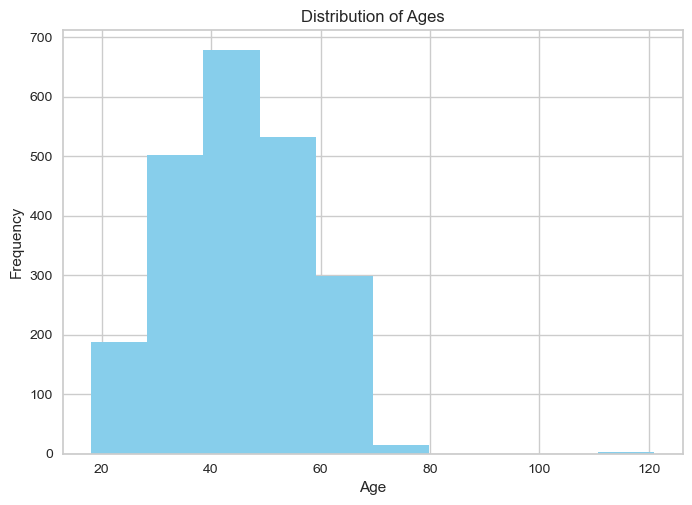

In [70]:
#adding new features
data["age"] = 2014 - data["Year_Birth"]
plt.hist(data['age'], bins=10, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

In [71]:
#Recoding categorical variables
data['Marital_Status'] = data['Marital_Status'].replace({'Married': 1, 'Together': 2, 'Single': 3, 'Divorced': 4, 'Widow': 5, 'Alone': 6, 'Absurd': 7, 'YOLO': 8})
data['Education'] = data['Education'].replace({'Graduation': 1, 'PhD': 2, 'Master': 3, '2n Cycle': 4, 'Basic': 5})

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,date,Customer_Days,age
0,5524,1957,1,3,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,2014-12-06,823,57
1,2174,1954,1,3,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,2014-12-06,273,60
2,4141,1965,1,2,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2014-12-06,472,49
3,6182,1984,1,2,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,2014-12-06,299,30
4,5324,1981,2,1,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014-12-06,321,33


In [72]:
#reducing number of features 
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
data["Children"]=data["Kidhome"]+data["Teenhome"]
# Assuming 'data' is your DataFrame
columns_to_drop = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Kidhome','Teenhome',"Z_CostContact", "Z_Revenue",'ID','Dt_Customer','date']
data = data.drop(columns=columns_to_drop, axis=1)
data.columns



Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Customer_Days', 'age', 'Spent', 'Children'],
      dtype='object')

In [73]:

data['Education'] = pd.to_numeric(data['Education'], errors='coerce')
data['Marital_Status'] = pd.to_numeric(data['Marital_Status'], errors='coerce')

print(data.dtypes)


Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Recency                  int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_Days            int64
age                      int64
Spent                    int64
Children                 int64
dtype: object


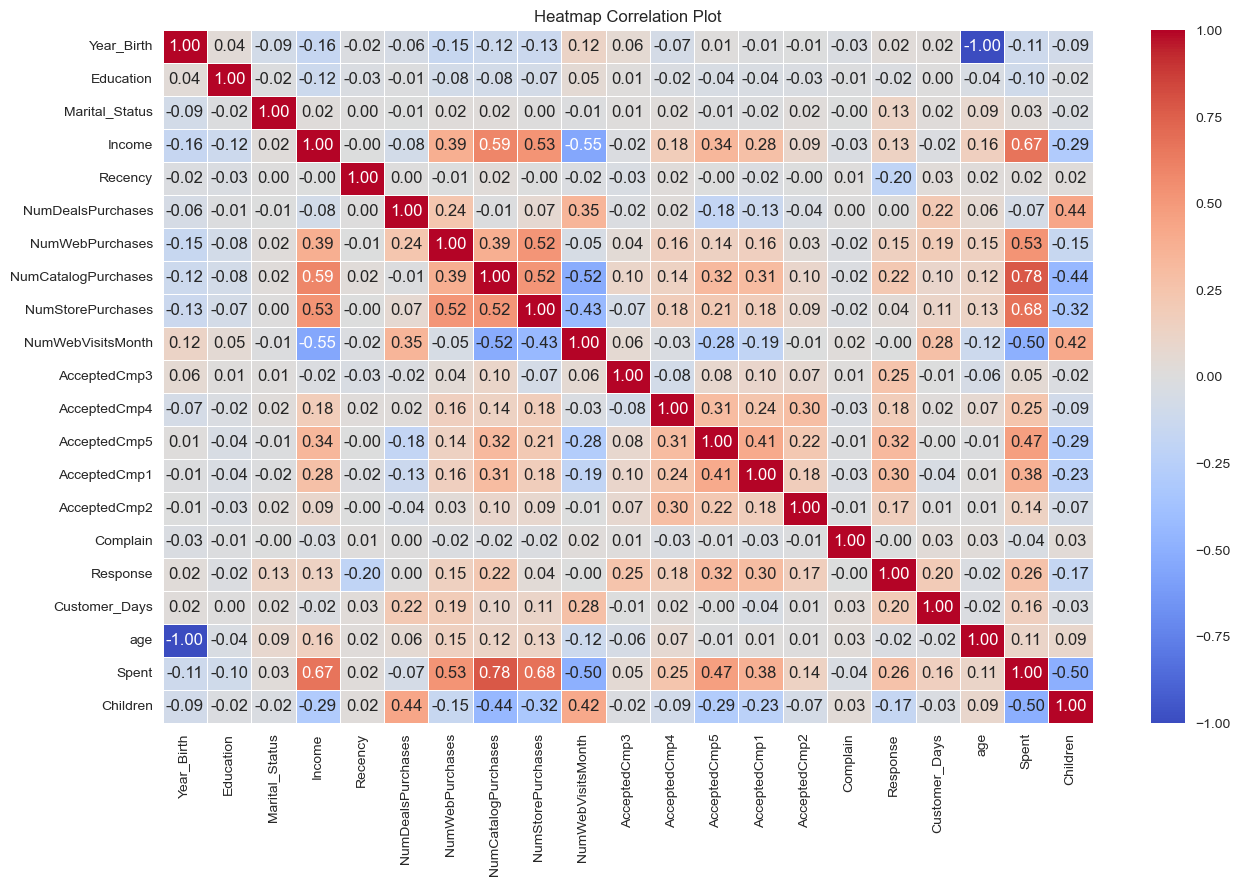

In [74]:
correlation_matrix = data.corr()

# Create a heatmap correlation plot
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Correlation Plot')
plt.show()

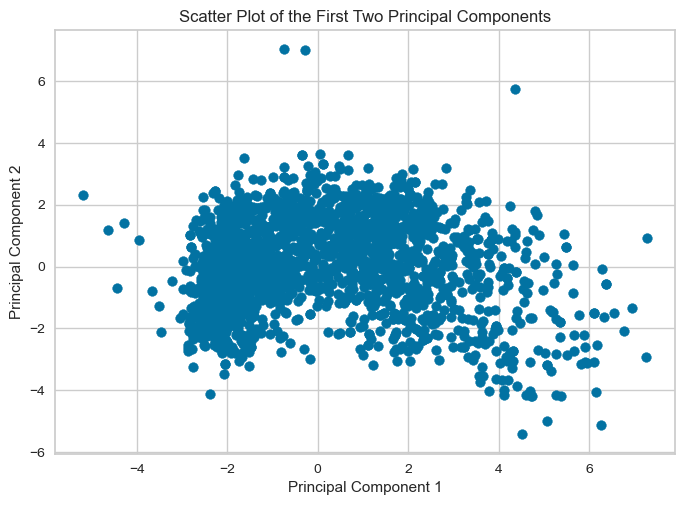

In [75]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)

# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot scatter of the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of the First Two Principal Components')
plt.show()

In [76]:
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2216.0,4.488988e-17,2.135029,-5.181783,-1.859273,-0.514786,1.507244,7.280859
PC2,2216.0,-9.619261e-17,1.474381,-5.429793,-0.985282,0.031055,1.118459,7.021160


In [77]:
pip install yellowbrick 

Note: you may need to restart the kernel to use updated packages.


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

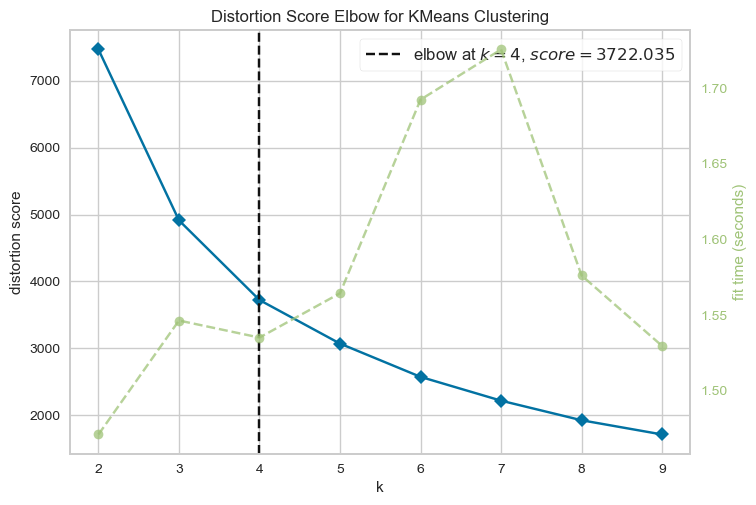

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
#Elbow Curve for K Means clustering algorithm 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
Elbow_Curve = KElbowVisualizer(KMeans(), k=(2,10))
Elbow_Curve.fit(pca_df)
Elbow_Curve.show()

## K Means 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


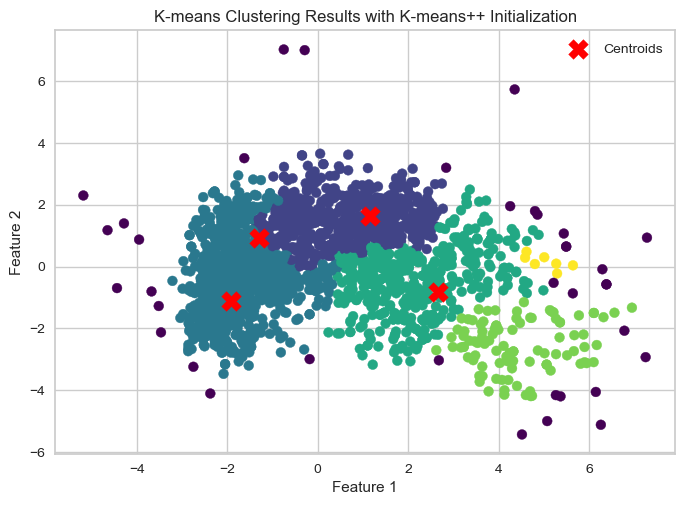

In [105]:
# Apply K-means clustering with K-means++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
pca_df['KM_labels'] = kmeans.fit_predict(pca_df)

# Visualize the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering Results with K-means++ Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Average Silhouette Score: 0.39262384999567895


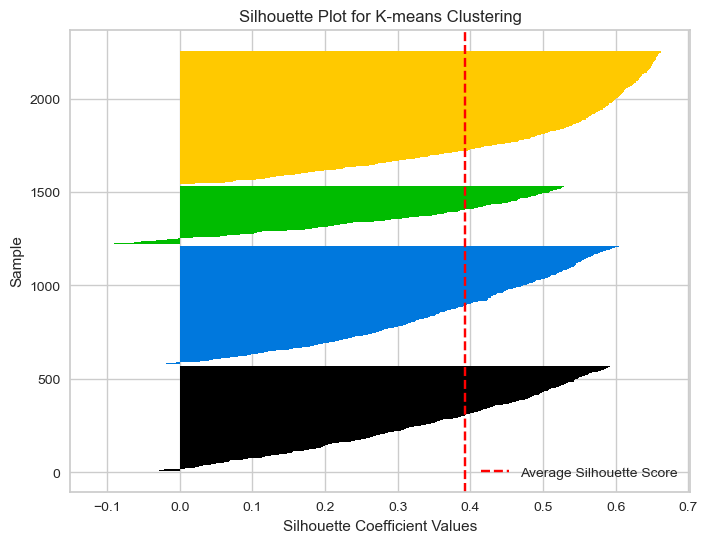

In [80]:
# Calculate silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"Average Silhouette Score: {silhouette_avg}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pca_df[['PC1', 'PC2']], pca_df['Cluster'])

# Plot the silhouette plot
plt.figure(figsize=(8, 6))

# Set up the vertical space for each cluster
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[pca_df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 4)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1, edgecolor='none', color=color)

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for K-means Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Sample")
plt.legend()
plt.show()

## Hierarchical Clustering

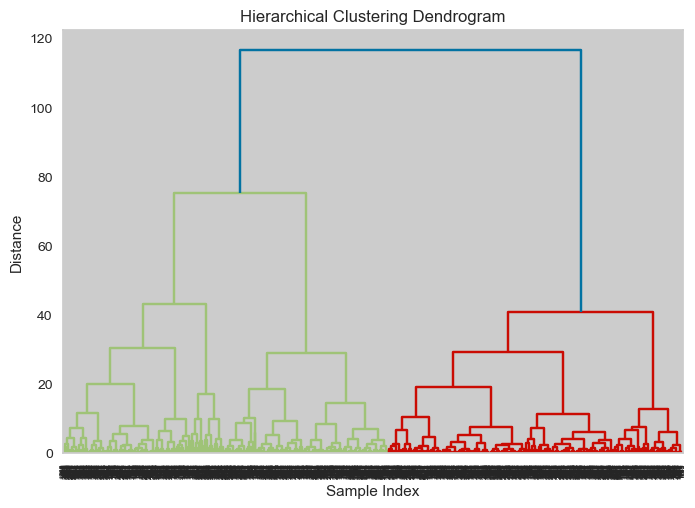

In [106]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply hierarchical clustering
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
pca_df['HC_labels'] = hc.fit_predict(pca_df[['PC1', 'PC2']])

# Plot the hierarchical clustering dendrogram
linked = linkage(pca_df[['PC1', 'PC2']], method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

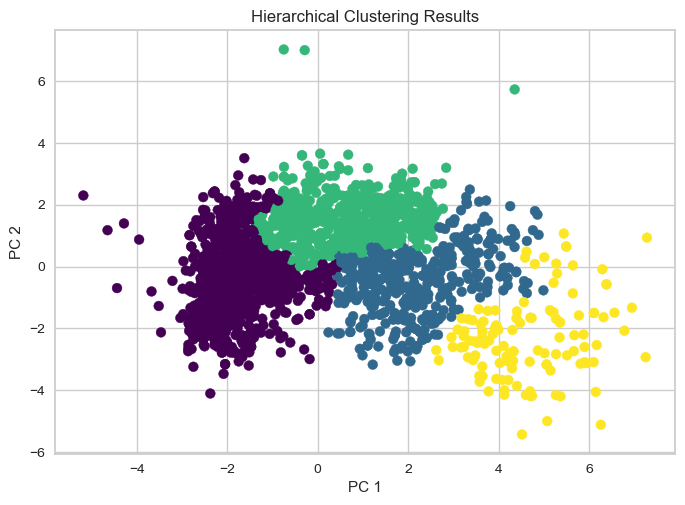

In [82]:
# Visualize the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c= pca_df['Cluster'], s=50, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

Average Silhouette Score: 0.35096167251076704


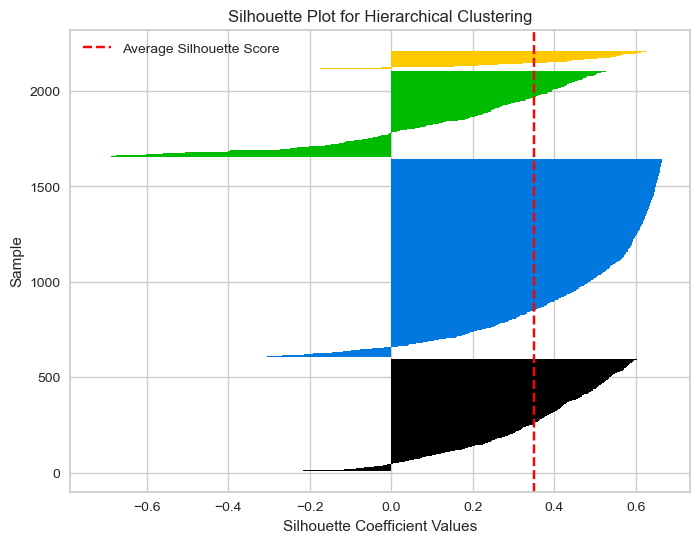

In [86]:
# Calculate silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"Average Silhouette Score: {silhouette_avg}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pca_df[['PC1', 'PC2']], pca_df['Cluster'])

# Plot the silhouette plot
plt.figure(figsize=(8, 6))

# Set up the vertical space for each cluster
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[pca_df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 4)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1, edgecolor='none', color=color)

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for Hierarchical Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Sample")
plt.legend()
plt.show()

## DBSCAN Clustering

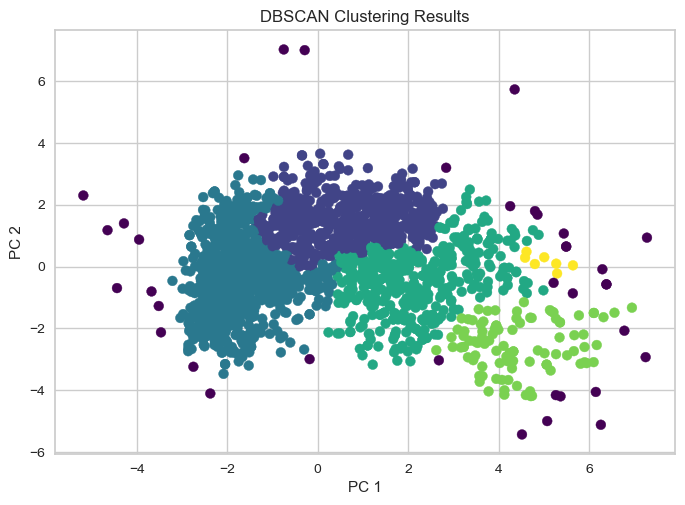

In [107]:
# Apply DBSCAN clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
pca_df['DB_labels']= dbscan.fit_predict(pca_df)

# Visualize the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], s=50, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()



Average Silhouette Score: 0.35096167251076704


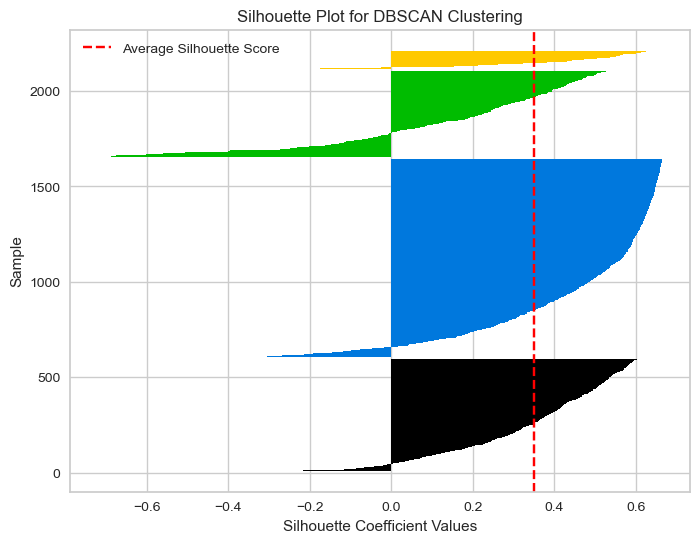

In [89]:
# Calculate silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"Average Silhouette Score: {silhouette_avg}")

# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pca_df[['PC1', 'PC2']], pca_df['Cluster'])

# Plot the silhouette plot
plt.figure(figsize=(8, 6))

# Set up the vertical space for each cluster
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[pca_df['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 4)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1, edgecolor='none', color=color)

    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.title("Silhouette Plot for DBSCAN Clustering")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Sample")
plt.legend()
plt.show()

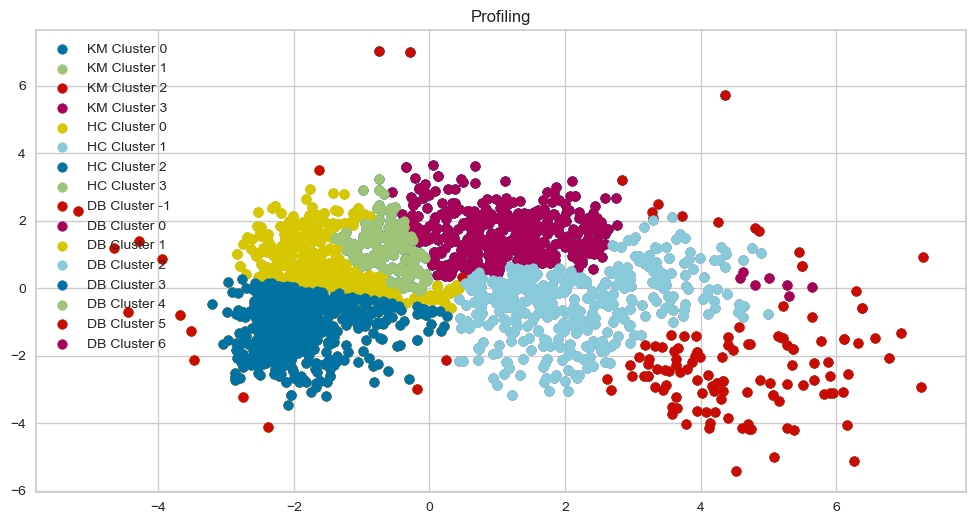

In [121]:
# Function for profiling clusters with DataFrame
def profile_clusters_df(data, km_labels, hc_labels, db_labels, title):
    unique_labels_km = np.unique(km_labels)
    unique_labels_hc = np.unique(hc_labels)
    unique_labels_db = np.unique(db_labels)
    
    plt.figure(figsize=(12,6))

    # Plot each cluster separately for K-Means Clustering
    for label in unique_labels_km:
        cluster_points = data[km_labels == label]
        plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'KM Cluster {label}')

    # Plot each cluster separately for Hierarchical Clustering
    for label in unique_labels_hc:
        cluster_points = data[hc_labels == label]
        plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'HC Cluster {label}')

    # Plot each cluster separately for DBSCAN Clustering
    for label in unique_labels_db:
        cluster_points = data[db_labels == label]
        plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'DB Cluster {label}')

    plt.title(f'{title}')
    plt.legend()
    plt.show()

# Call the function with the modified DataFrame and labels
profile_clusters_df(pca_df[['PC1', 'PC2']], pca_df['KM_labels'], pca_df['HC_labels'], pca_df['DB_labels'], title='Profiling')

